In [61]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import numpy as np
import math
import sys
import os
import pickle

from dataset.mnist import load_mnist
from PIL import Image

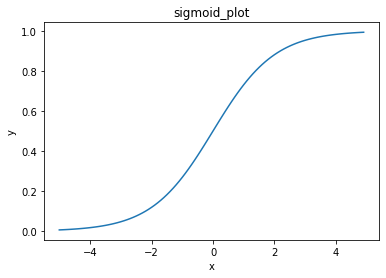

In [51]:
def sigmoid(x):

    return 1/(1 + np.exp(-1*x))


x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, label = "sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sigmoid_plot")
plt.show()

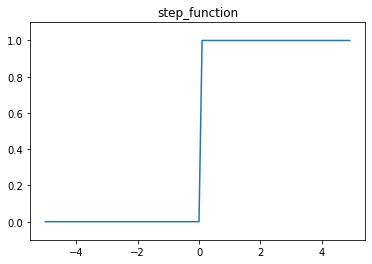

In [3]:
def step_function(x):
    
    y = x > 0
    return y.astype(np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("step_function")
plt.show()

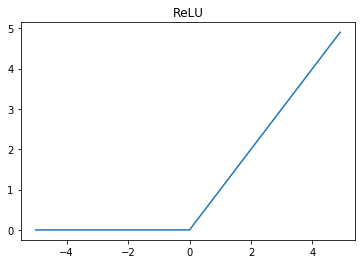

In [5]:
def ReLU(x):
    
    return np.maximum(0, x)


x = np.arange(-5, 5, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.title("ReLU")
plt.show()

In [7]:
X_array = np.array([1, 2])
W_array = np.array([[1, 3, 5], [2, 4, 6]])
Y_array = np.dot(X_array, W_array)

print(Y_array)

[ 5 11 17]


In [11]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.3], [0.5, 0.7], [0.9, 1.1]])
    network["b2"] = np.array([0.4, 0.5])
    network["W3"] = np.array([[0.1, 0.4], [0.7, 1.0]])
    network["b3"] = np.array([0.6, 0.7])
    
    return network

def forward(network, x):
    W1, W2 ,W3 = network["W1"], network["W2"], network["W3"]
    b1, b2 ,b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    z3 = a3
    
    y = z3
    
    return y

network = init_network()
x = np.array([0.25, 0.75])
y = forward(network, x)

print(y)

[1.28891943 1.89093421]


In [14]:
def tiny_softmax_1(x, index):
    
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    
    return exp_x[index]/sum_exp_x

x = np.array([0.1, 0.3, 0.5])

for i in range(len(x)):
    print(tiny_softmax(x, i))

0.26930749917773783
0.32893292228890664
0.40175957853335537


In [39]:
def tiny_softmax_2(x, index):
    
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    
    return exp_x[index]/sum_exp_x

x = np.array([100, 3000, 50000])

print("over flow")
for i in range(len(x)):
    print(tiny_softmax(x, i))

print("not over flow")
for i in range(len(x)):
    print(softmax(x, i))

over flow
0.0
nan
nan
not over flow
0.0
0.0
1.0


C:\Users\chest\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chest\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [44]:
def softmax(x):
    x = x - np.max(x, axis = -1, keepdims = True)
    return np.exp(x)/np.sum(np.exp(x), axis = -1, keepdims = True)

In [24]:
# current directory の直上にdatasetディレクトリがあればいい
# download用
sys.path.append(os.pardir)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [29]:
def image_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
    return None


(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
# 1次元配列を元の画像サイズに整形
img = img.reshape(28, 28)
print(img.shape)

image_show(img)

5
(784,)
(28, 28)


In [60]:
def get_data():
    
    # normalize = Falseでオーバーフロー
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = True, one_hot_label = False)
    
    return x_test, t_test


def init_network():
    
    with open(".\\sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
        return network
    

def predict(network, x):
    
    W1, W2 ,W3 = network["W1"], network["W2"], network["W3"]
    b1, b2 ,b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    z3 = softmax(a3)
    
    y = z3
    
    return y

print("cwd is " + os.getcwd())

# データ取得
x, t = get_data()
network = init_network()

# テストデータ数だけループ
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    
    # 最も確率の高いラベルとラベルの正解が一致してたら正答数をインクリメント
    if p == t[i]:
        accuracy_cnt += 1
        
# 正解の割合を表示
print("Accuracy:" + str(float(accuracy_cnt/len(x))))

cwd is C:\Users\chest\Desktop\python\Learning_python
Accuracy:0.9352


In [57]:
# データ取得
x, t = get_data()
network = init_network()

# batch size
batch_size = 100

accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    
    # バッチごとに比較してaccuracy_cntをインクリメント
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
# 正解の割合を表示
print("Accuracy:" + str(float(accuracy_cnt/len(x))))

Accuracy:0.9352
